# THE SPARKS FOUNDATION - GRIP

# DATA SCIENCE AND BUSINESS ANALYTICS

# NAME: ANANYA M

# TASK 3: Exploratory Data Analysis - Retail

Q) Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you can derive by exploring the data?

# Importing the Libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#Reading the data from local
store_df = pd.read_csv("C:/Users/Ananya/Downloads/SampleSuperstore (1).csv")

In [63]:
store_df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200



Understanding the Data :

In United States, A Superstore suplies 3 Categories - Furniture, Office Supplies and Technology consists of 17 subcategories in 4 Regions where items are shipped in 532 cities of 49 States to 3 Segments - 'Consumer', 'Corporate' and 'Home Office' with Shipping facilities of 'Second Class','Standard Class', 'First Class', 'Same Day'.

# Data Overview

In [64]:

#The function "shape" returns the lenghts of an array dimension.
store_df.shape

(9994, 13)

In [65]:
store_df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [66]:
#isnull() function detect missing values in the particular columns. 
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [67]:
#nunique() function return number of unique elements in the object. It returns a scalar value which is the count of all the unique values in the Index.
for i in store_df.columns:
    print(i,store_df[i].nunique())

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


As we know, Superstore is based in United States, It's better to remove the columns which would not create any impact whilst exploring the Data. So, We can drop 'Country', 'Postal Code' from the dataset.

In [68]:
store_df.drop(['Country', 'Postal Code'], axis = 1, inplace = True)


# Exploring the Unique Values in categorical Columns

In [69]:
store_df['Ship Mode'].unique()


array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [70]:

store_df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [71]:
store_df['Category'].unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

# Dealing with Outliers


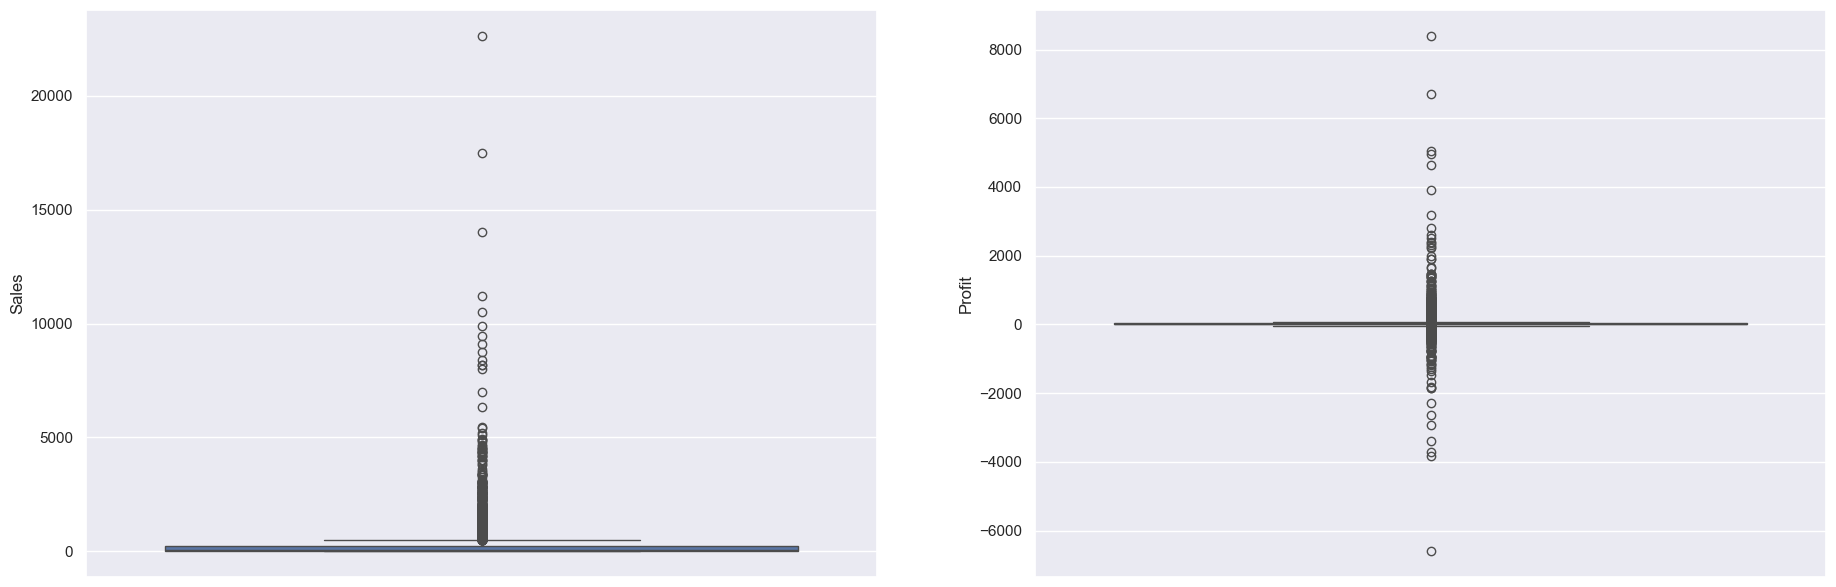

In [72]:

plt.subplot(1, 2, 1)
sns.boxplot(store_df['Sales'])

plt.subplot(1, 2, 2)
sns.boxplot(store_df['Profit'])

plt.gcf().set_size_inches(20, 7)

# Check How many Outliers present in the 'Sales' and 'Profit' columns



In [73]:

sales_mean, sales_std = store_df['Sales'].mean(), store_df['Sales'].std()
# identify outliers
cut_off = sales_std * 3
lower, upper = sales_mean - cut_off, sales_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Sales'] if x < lower or x > upper]
print('Identified outliers in Sales: %d' % len(outliers))

Identified outliers in Sales: 127


In [74]:
profit_mean, profit_std = store_df['Profit'].mean(), store_df['Profit'].std()
# identify outliers
cut_off = profit_std * 3
lower, upper = profit_mean - cut_off, profit_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Profit'] if x < lower or x > upper]
print('Identified outliers in Profit: %d' % len(outliers))

Identified outliers in Profit: 107


# Check How many Outliers present in the 'Quantity' and 'Discount' columns



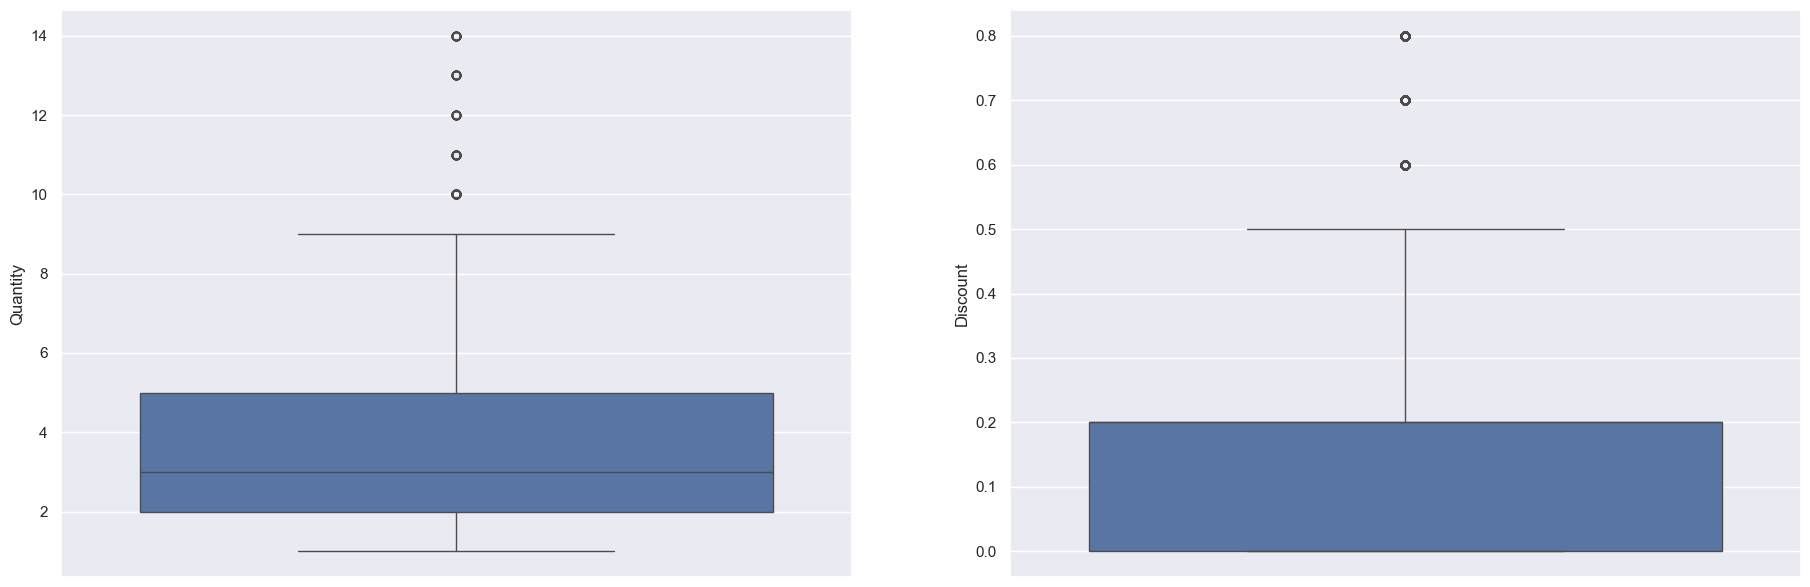

In [75]:

plt.subplot(1, 2, 1)
sns.boxplot(store_df['Quantity'])

plt.subplot(1, 2, 2)
sns.boxplot(store_df['Discount'])

plt.gcf().set_size_inches(20, 7)

As, we have observed there are many outliers. Let's remove the outliers first



In [76]:
discount_mean, discount_std = store_df['Discount'].mean(), store_df['Discount'].std()
# identify outliers
cut_off = discount_std * 3
lower, upper = discount_mean - cut_off, discount_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Discount'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 300


In [77]:
Quantity_mean, Quantity_std = store_df['Quantity'].mean(), store_df['Quantity'].std()
# identify outliers
cut_off = Quantity_std * 3
lower, upper = Quantity_mean - cut_off, Quantity_mean + cut_off
# identify outliers
outliers = [x for x in store_df['Quantity'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 113


Indentifile Outliers in following Attributes:

Sales : 127

Profit : 107

Quantity : 113

Discount : 300

# Removing the Outliers


In [78]:
for i in ['Sales']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<Axes: xlabel='Sales'>

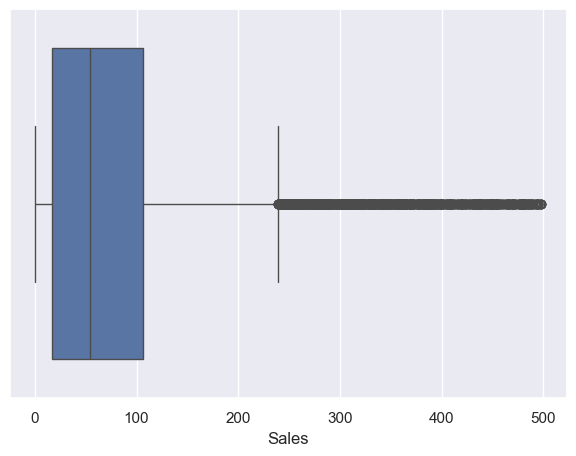

In [79]:
store_df['Sales'].fillna(store_df['Sales'].mean(), inplace = True)
sns.boxplot(x = store_df['Sales'])

In [80]:
for i in ['Profit']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<Axes: xlabel='Profit'>

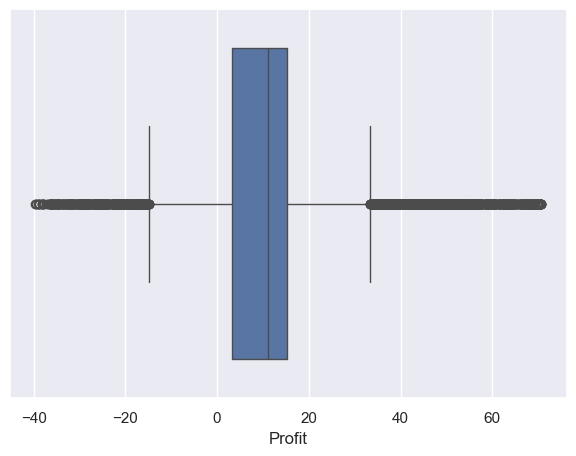

In [81]:

store_df['Profit'].fillna(store_df['Profit'].mean(), inplace = True)
sns.boxplot(x = store_df['Profit'])

In [82]:

for i in ['Discount']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<Axes: xlabel='Discount'>

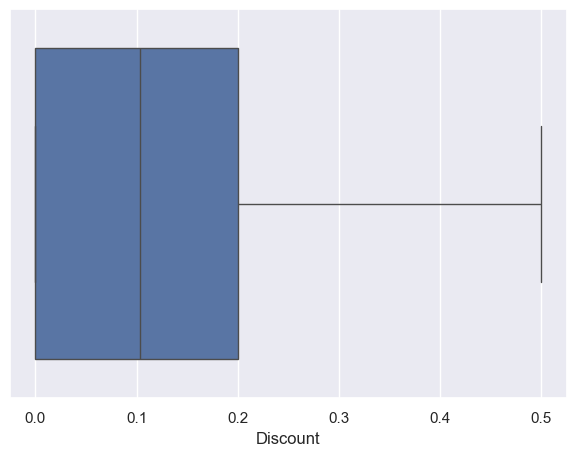

In [83]:
store_df['Discount'].fillna(store_df['Discount'].mean(), inplace = True)
sns.boxplot(x = store_df['Discount'])

In [84]:
for i in ['Quantity']:
    q3, q1 = np.percentile(store_df.loc[: , i],[75,25])
    iqr = q3 - q1
    
    
    max = q3 + (1.5 * iqr)
    min = q1 - (1.5 * iqr)
    
    #Replacing the Outlier Values with Nan
    
    store_df.loc[store_df[i] < min, i] = np.nan
    store_df.loc[store_df[i] > max, i] = np.nan

<Axes: xlabel='Quantity'>

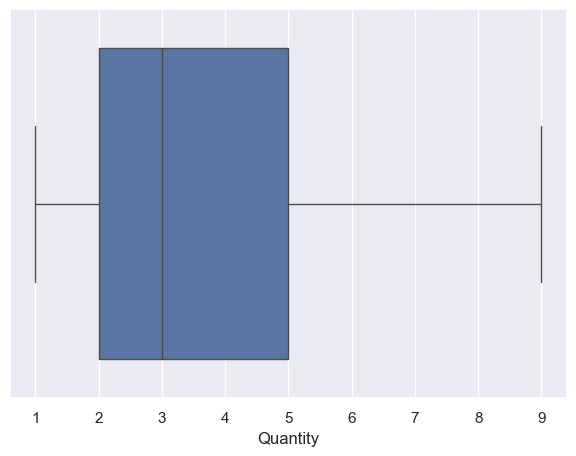

In [85]:
store_df['Quantity'].fillna(store_df['Quantity'].mean(), inplace = True)
sns.boxplot(x = store_df['Quantity'])

# We have successfully reomved the Outliers.



In [86]:

store_df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.960000,2.0,0.00,41.913600
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,92.864853,3.0,0.00,11.604086
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.620000,2.0,0.00,6.871400
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,92.864853,5.0,0.45,11.604086
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368000,2.0,0.20,2.516400
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.248000,3.0,0.20,4.102800
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.960000,2.0,0.00,15.633200
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.576000,2.0,0.20,19.393200
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.600000,4.0,0.00,13.320000


# Univariate Analysis


In [87]:
(store_df['Ship Mode'].value_counts()/store_df.shape[0])*100


Ship Mode
Standard Class    59.715829
Second Class      19.461677
First Class       15.389234
Same Day           5.433260
Name: count, dtype: float64

<Axes: xlabel='Ship Mode', ylabel='Count'>

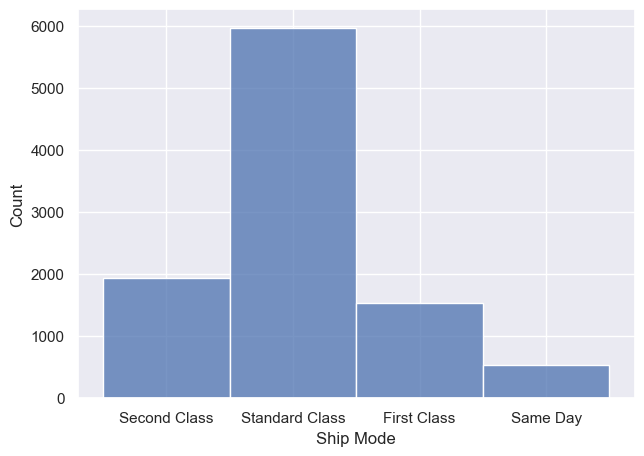

In [88]:
sns.histplot(store_df['Ship Mode'])


Conclusion : 'Standard Shipping' mode is highly preferred whersas 'Same Day' is least



In [89]:
(store_df['Segment'].value_counts()/store_df.shape[0])*100


Segment
Consumer       51.941165
Corporate      30.218131
Home Office    17.840704
Name: count, dtype: float64

<Axes: xlabel='Segment', ylabel='Count'>

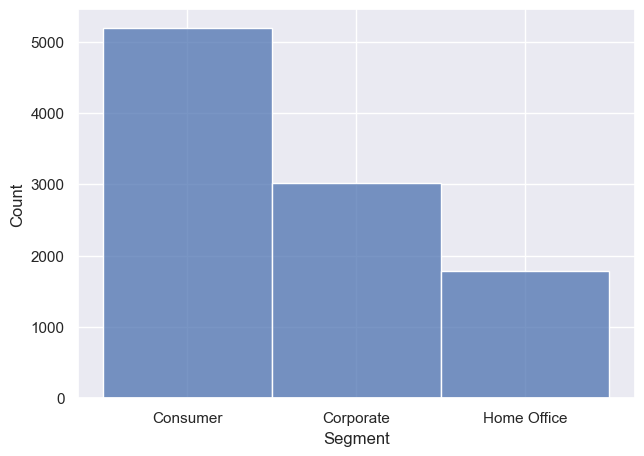

In [90]:
sns.histplot(store_df['Segment'])


Conclusion : 50% of people belong to consumer class whereas 20-30% people belong to Home Office & Corporate



In [91]:
(store_df['Category'].value_counts()/store_df.shape[0])*100


Category
Office Supplies    60.296178
Furniture          21.222734
Technology         18.481089
Name: count, dtype: float64

<Axes: xlabel='Category', ylabel='Count'>

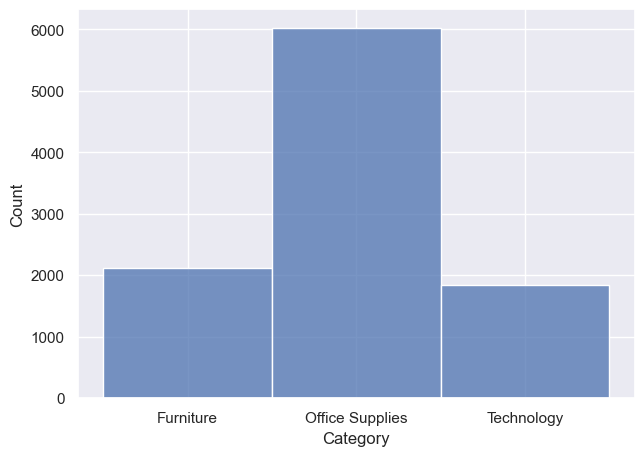

In [92]:
sns.histplot(store_df['Category'])


Conclusion : 60% of the Categories belong to Office Supplies whereas approximately 20 - 20% of Categories belongs to Furniture and Technology



In [93]:
(store_df['Sub-Category'].value_counts()/store_df.shape[0])*100


Sub-Category
Binders        15.239143
Paper          13.708225
Furnishings     9.575745
Phones          8.895337
Storage         8.465079
Art             7.964779
Accessories     7.754653
Chairs          6.173704
Appliances      4.662798
Labels          3.642185
Tables          3.191915
Envelopes       2.541525
Bookcases       2.281369
Fasteners       2.171303
Supplies        1.901141
Machines        1.150690
Copiers         0.680408
Name: count, dtype: float64

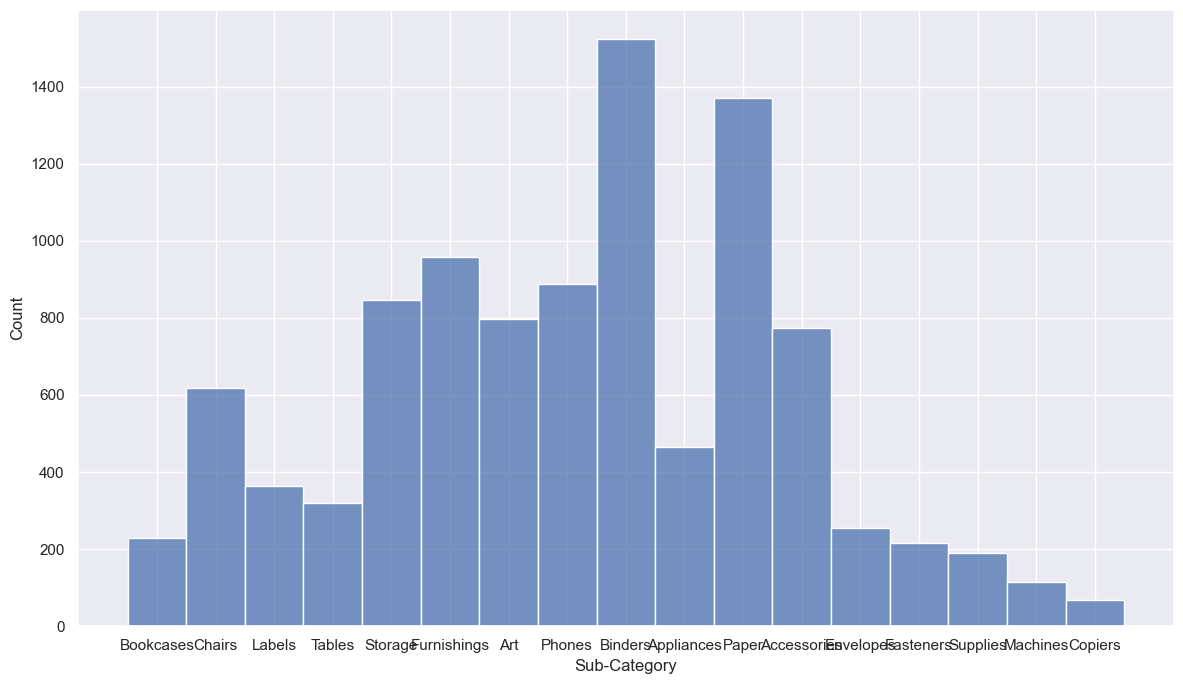

In [94]:

sns.histplot(store_df['Sub-Category'])
plt.gcf().set_size_inches(12,7)
plt.tight_layout()


Conclusion : Binders and Papers are the most exisiting Sub-Category in Superstore

9 - 15% of SubCategories fall under Office Suplies whereas 2-8% come under Technology and Furniture

# Bivariate Analysis


<Axes: xlabel='Category'>

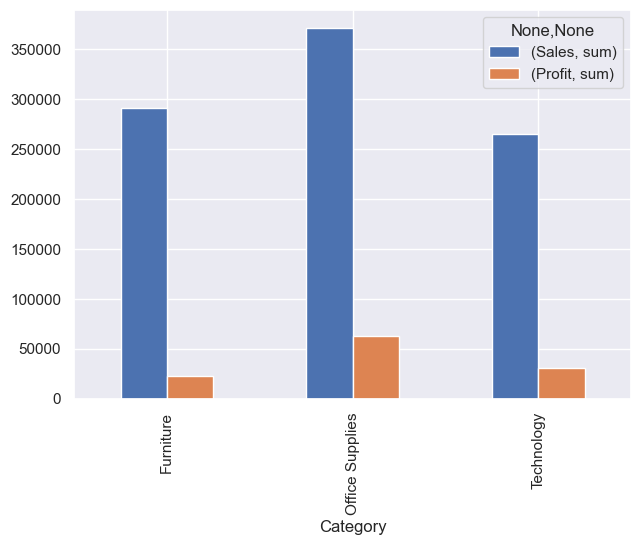

In [95]:
store_df.groupby('Category')[['Sales', 'Profit']].agg(['sum']).plot.bar()


From this Graph, We can conclude that:

-Technology Products has the highest Sales and Profit

-Furniture has moderate Sales but less Profit

-Office Supplies has the least Sales but moderate Profit

<Axes: xlabel='Region', ylabel='count'>

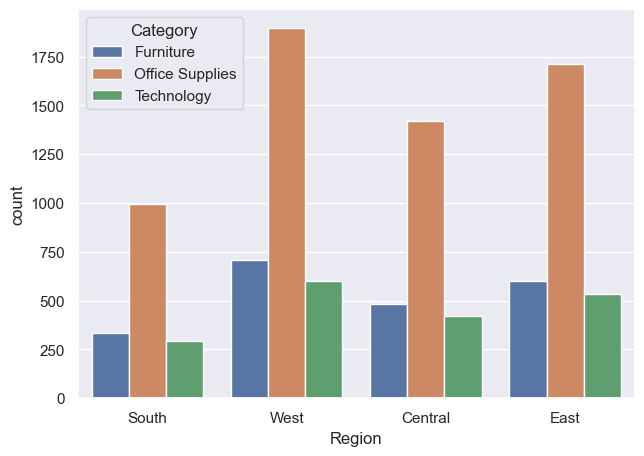

In [96]:
sns.countplot(x=store_df['Region'], hue = store_df['Category'])


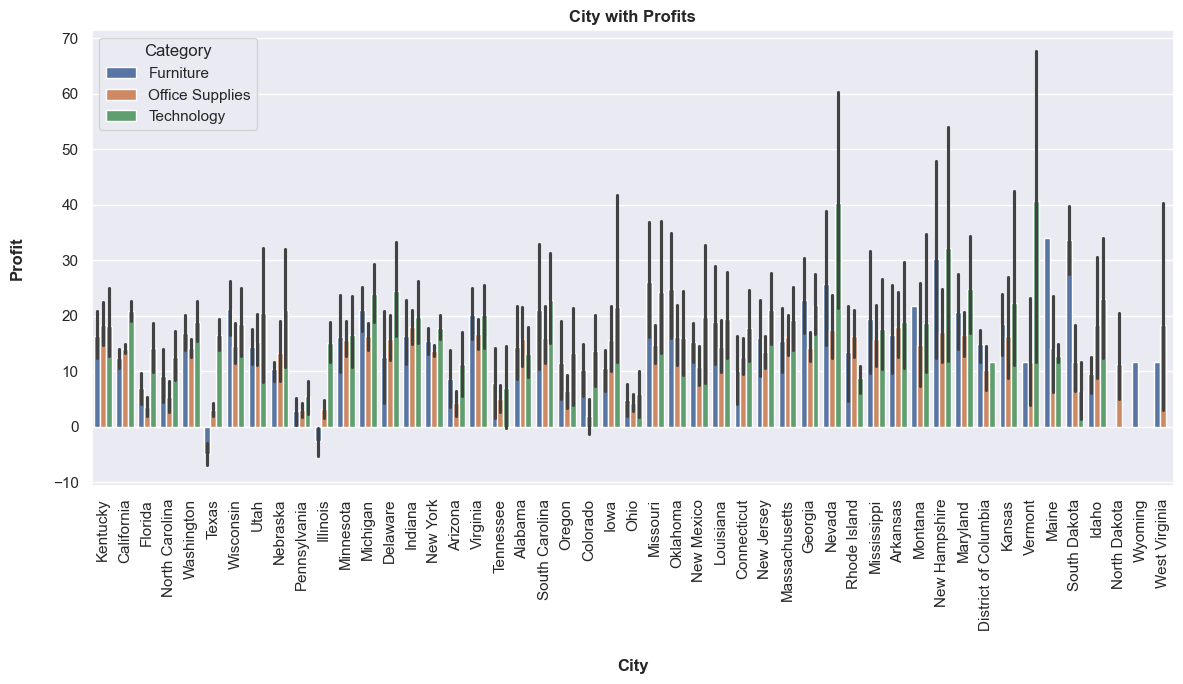

In [97]:

txt = {'weight':'bold'}
sns.barplot(x = store_df['State'], y= store_df['Profit'], hue = store_df['Category'])
plt.title("City with Profits", fontdict = txt)
plt.xticks(rotation = 90)
plt.xlabel('City', fontdict = txt, labelpad = 20)
plt.ylabel('Profit', fontdict = txt, labelpad = 20)

plt.gcf().set_size_inches(12, 7)
plt.tight_layout()

This graph elaborates:

-Vermont, Nevada & New Hamsphire has the highest Profit(40-60%)in Technology Category moderate in Office Supplies and Furniture

-Texas and Chicago both Cities are in loss


Let us encounter the relations of the attributes



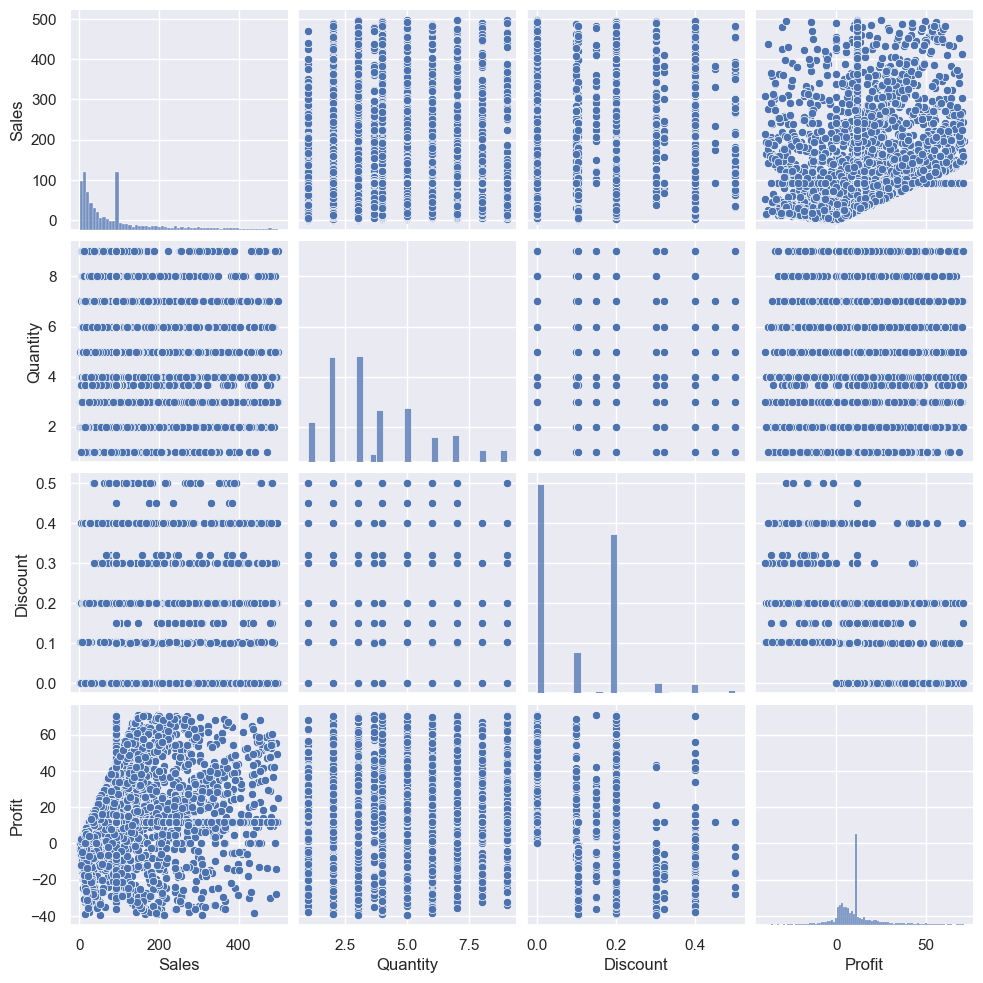

In [102]:

sns.pairplot(store_df)

Now, As a business manager, try to find out the weak areas where you can work to make more profit.



In [103]:
store_df.pivot_table(values =  'Profit', index = 'Segment', columns = 'Discount', aggfunc = 'median')


Discount,0.00000,0.10000,0.10349,0.15000,0.20000,0.30000,0.32000,0.40000,0.45000,0.50000
Segment,,,,,,,,,,
Consumer,11.604086,11.604086,-4.7520,6.549000,7.1974,-3.0852,-6.019600,11.604086,11.604086,11.604086
Corporate,11.604086,11.604086,-3.9624,11.604086,7.2576,-2.6982,11.604086,11.604086,11.604086,11.604086
Home Office,11.604086,13.437200,-6.3330,15.697800,7.9378,-2.3480,11.604086,11.604086,11.604086,11.604086


In [104]:
store_df.pivot_table(values =  'Sales', index = 'Segment', columns = 'Discount', aggfunc = 'median')


Discount,0.00000,0.10000,0.10349,0.15000,0.20000,0.30000,0.32000,0.40000,0.45000,0.50000
Segment,,,,,,,,,,
Consumer,51.900,136.944000,11.6730,239.666,51.540,127.379,156.372800,109.773000,182.787000,145.980000
Corporate,58.580,92.864853,12.0600,282.166,52.184,113.372,149.098826,92.864853,92.864853,92.864853
Home Office,49.645,145.764000,12.2475,119.833,52.680,208.474,196.698826,92.864853,163.362426,92.864853


Conclusion: For discount more than 30%, the superstore was going on loss

For Discount between (0-20%), sales was average but It was gaining the profit

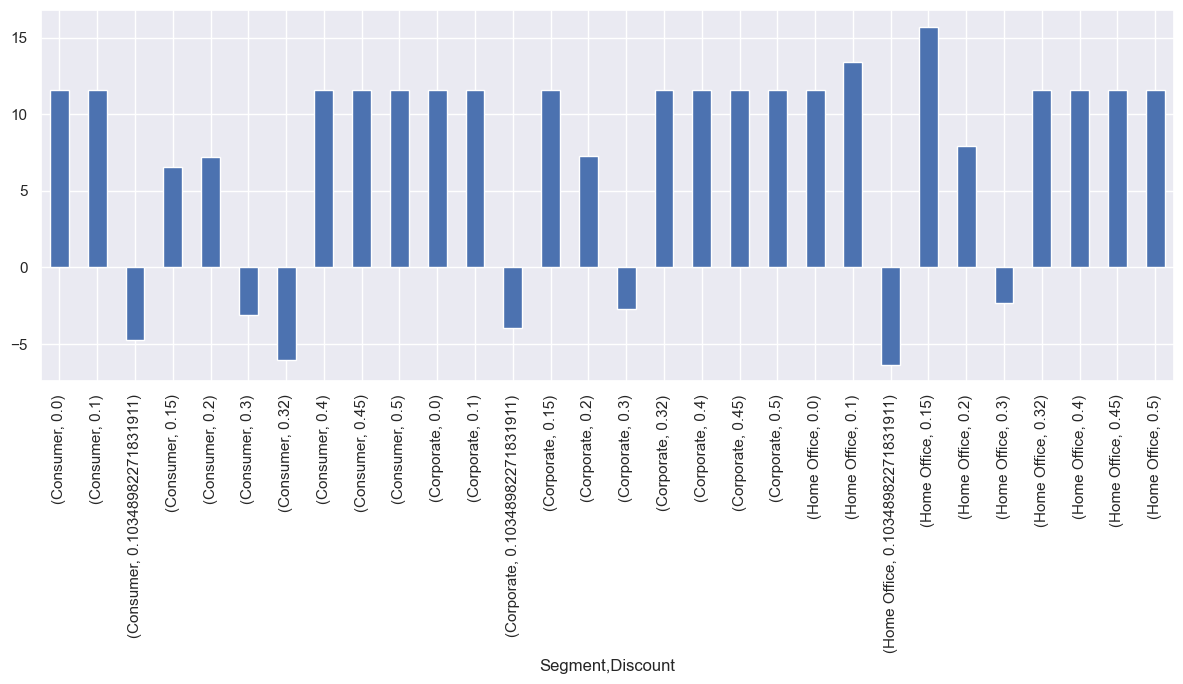

In [106]:

dis = store_df.groupby(['Segment','Discount']).Profit.median()
dis.plot(kind = 'bar', stacked = True)
plt.gcf().set_size_inches(12,7)
plt.tight_layout()

# Conclusion :

-Discount > 30% to the Segment, would result in loss whereas <30% is making profit.

-We should limit the sales of furniture and increase that of office supplies and technology as furtinute is generating very less profit as compared to its sales.

-In the sub-gategories we are facing huge loss on the sale of tables so its sale should be minimized.

-The sales and profit in Southern and Central region are less so we should give more incentives like discount in these states in order to increase sales, hence profit will increase.

-After the highest sales in California we have high value of potenial customers in Texas and New York so we should concentrate more on these states to generate more profit.

-We have highest purchases in consumer segment but we should also concentrate on corporate and home office segments to increase our sales and profit. 6.Few states like North Dakota, Wyoming and West Virginia have less or no sales at all so we also need to focus on these state.